In [1]:
import numpy as np
import os
os.chdir("C:\\Users\\ma11115\\OneDrive - Imperial College London\\github_folder\\STK_SEARCH")

In [3]:
import pandas as pd
from stk_search import Database_utils
import importlib
importlib.reload(Database_utils)
#%% 
# Load the searched space
df_path = 'data/output/Full_datatset/df_total_new2023_08_20.csv'
df_precursors_path = 'data/output/Prescursor_data/calculation_data_precursor_190923_clean.pkl'#'Data/output/Prescursor_data/calculation_data_precursor_310823_clean.pkl'
df_total, df_precursors = Database_utils.load_data_from_file(df_path, df_precursors_path)


C:\Users\ma11115\OneDrive - Imperial College London\github_folder\STK_search\src\stk_search\Database_utils.py:73: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  df_total = pd.read_csv(df_path)


In [5]:
import numpy as np
slatm_rpr = np.load('data/output/Full_dataset/repr_df_total_new2023_08_20.npy',allow_pickle=True)
slatm_name = np.load('data/output/Full_dataset/names_df_total_new2023_08_20.npy',allow_pickle=True)

In [39]:
slatm_rpr.shape

(40975, 40221)

In [40]:
from sklearn.decomposition import PCA
PCA_components = 1000
pca = PCA(n_components=PCA_components)
pca.fit(slatm_rpr)
pca_rpr = pca.transform(slatm_rpr)
pca_rpr.shape

(40975, 1000)

In [58]:
from stk_search import Search_algorithm
from stk_search import Searched_space
from stk_search import Database_utils
import importlib
importlib.reload(Search_algorithm)

# add pca to df_total

# distribute pca_rpr column to each element
PCA_components=1000
def prepare_search_sapce_data_slatm(SP):
    df_new = pd.concat([df_total, pd.DataFrame(pca_rpr)], axis=1)
    searched_space_df = SP.check_df_for_element_from_SP(df_to_check=df_new)
    searched_space_df=searched_space_df[searched_space_df['target']>-10]
    searched_space_df_sample = searched_space_df.sample(100)
    fitness_acquired_sample = searched_space_df_sample['target'].values
    fitness_acquired = searched_space_df['target'].values
    searched_space_df=searched_space_df[[x for x in range(PCA_components)]]
    searched_space_df_sample = searched_space_df_sample[[x for x in range(10)]]
    return searched_space_df, searched_space_df_sample, fitness_acquired, fitness_acquired_sample

In [45]:
from stk_search import Search_algorithm
from stk_search import Searched_space
from stk_search import Database_utils
import importlib
importlib.reload(Search_algorithm)

def prepare_search_sapce_data(SP):
    SP.add_TSNE_to_df_precuros()
    print(len(SP.precursor_TSNE_X_2d))
    #SP.features_frag=SP.features_frag.append(df_precursors.columns[29:38])
    SP.features_frag=SP.features_frag.append(df_precursors.columns[1:7])
    SP.features_frag=SP.features_frag.append(df_precursors.columns[17:23])
    SP.features_frag=SP.features_frag.append(df_precursors.columns[:1])
    print(SP.features_frag)
    searched_space_df = SP.check_df_for_element_from_SP(df_to_check=df_total)
    searched_space_df=searched_space_df[searched_space_df['target']>-10]

    searched_space_df_sample = searched_space_df.sample(100)
    fitness_acquired_sample = searched_space_df_sample['target'].values
    fitness_acquired = searched_space_df['target'].values
    col_list = []
    for x in SP.features_frag:
        for i in range(6):
            col_list.append(x+f'_{i}')
    searched_space_df = searched_space_df[col_list]
    numeric_cols = searched_space_df.select_dtypes(include=['float64', 'int64','float32']).columns
    searched_space_df = searched_space_df[numeric_cols]
    searched_space_df_sample=searched_space_df_sample[col_list]
    searched_space_df_sample = searched_space_df_sample[numeric_cols]
    return searched_space_df, searched_space_df_sample, fitness_acquired, fitness_acquired_sample

Training size torch.Size([796, 1000])


c:\Users\ma11115\OneDrive - Imperial College London\github_folder\BO_polymers\.conda\lib\site-packages\botorch\models\utils\assorted.py:173: InputDataWarning: Input data is not contained to the unit cube. Please consider min-max scaling the input data.
  warnings.warn(msg, InputDataWarning)


R2 score: 0.60
MSE score: 1.05
MAE score: 0.77
R2 score: 0.87
MSE score: 0.34
MAE score: 0.41


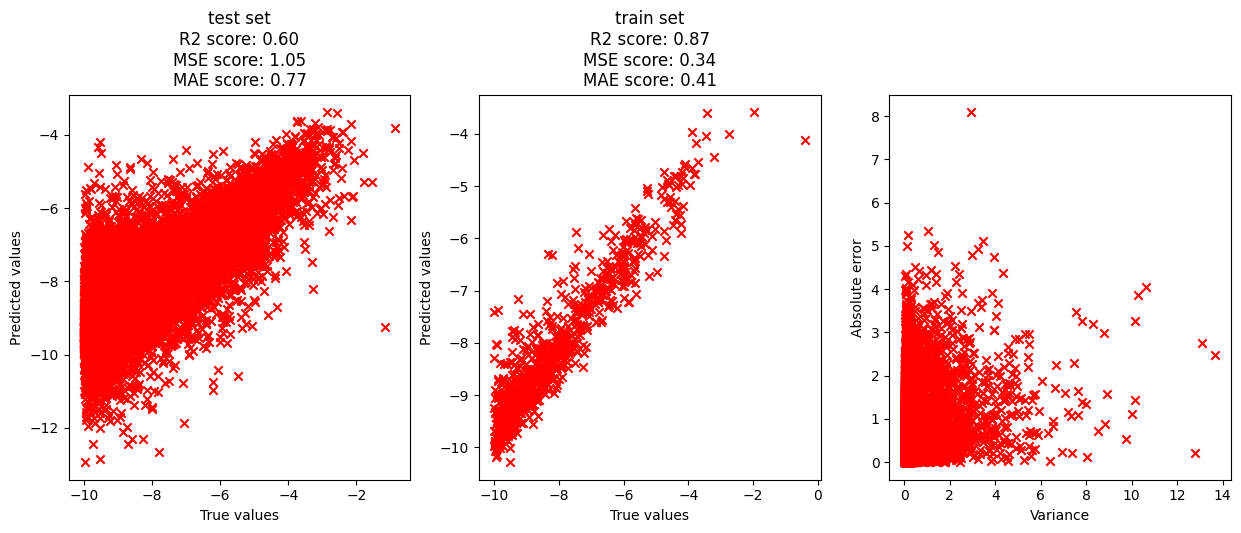

In [59]:
# get the search space using slatm


SP = Searched_space.Searched_Space(number_of_fragments=6,df=df_precursors,features_frag=df_precursors.columns[0:1],generation_type='conditional')
# run BO

searched_space_df, searched_space_df_sample, fitness_acquired, fitness_acquired_sample = prepare_search_sapce_data_slatm(SP)
BO = Search_algorithm.Bayesian_Optimisation()
BO.verbose = True
%matplotlib inline
X_train, X_test, y_train , y_test, y_scaler   = BO.get_test_train_data_for_BO(searched_space_df,fitness_acquired,test_set_size=0.95)  
print('Training size',X_train.shape)
y_pred, y_var, y_pred_train, y_train, y_test, y_var_train = BO.test_model_prediction(X_train, y_train, X_test, y_test, y_scaler)
BO.plot_prediction(y_pred,y_test,y_pred_train,y_train,y_var)


Training size torch.Size([796, 40221])


InputDataError: Input data contains NaN values.

In [36]:
searched_space_df

0          1          2          3          4          5  \
167     92.407222  -2.790745   7.176590 -28.074323 -27.745145  -3.873604   
262     81.801435  16.918713 -26.512565 -13.656079  -2.051322  12.435495   
351    121.720341   1.952669 -40.444426  22.595228   6.906631   9.486484   
353    128.905879 -29.040268 -23.807854  21.460515 -11.883595 -11.209085   
376    128.986969 -29.102999 -23.708409  21.494914 -11.865922 -11.182561   
...           ...        ...        ...        ...        ...        ...   
40955  -37.166896 -61.142777  19.496855 -28.458333 -44.278330  20.570130   
40956  -82.933082 -95.881518 -34.440765   2.214328  40.410326   6.129173   
40963  -89.911721 -87.883590   1.080018 -21.970531  26.998853  19.935408   
40969  -55.687402 -11.098811 -22.492063 -33.524105  19.103129 -32.375872   
40972 -118.867042 -93.402973  57.356910 -55.955392 -38.827885  14.005550   

               6          7          8          9  
167    16.186957   2.334407   4.509424   0.338966  
262    24.950786 -11.264928  20.704426   1.424876  
351    14.607680 -12.081969  18.501800   1.981277  
353     7.886997   0.665345  -3.340277  -0.129792  
376     7.823126   0.703204  -3.284987  -0.142290  
...          ...        ...        ...        ...  
40955  -7.896520  99.310089  43.502940   9.817707  
40956   2.434935  13.875858 -24.988248  29.578973  
40963  -2.275840  17.128901 -11.462354  32.924813  
40969  16.408013  -9.625128  -1.607916   3.361988  
40972  12.961699  -9.170656   2.640465  11.604659  

[15921 rows x 10 columns]

312
Index(['InChIKey', 'Atom_num', 'HOMO (eV)', 'LUMO (eV)', 'HOMO_LUMO_GAP (eV)',
       'IP (eV)', 'EA (eV)', '1 Excited state Energy (eV)',
       '1 Excited state Osc', '2 Excited state Energy (eV)',
       '2 Excited state Osc', '3 Excited state Energy (eV)',
       '3 Excited state Osc', 'InChIKey'],
      dtype='object')
Training size torch.Size([1592, 72])


c:\Users\ma11115\OneDrive - Imperial College London\github_folder\BO_polymers\.conda\lib\site-packages\botorch\models\utils\assorted.py:173: InputDataWarning: Input data is not contained to the unit cube. Please consider min-max scaling the input data.
  warnings.warn(msg, InputDataWarning)


R2 score: 0.52
MSE score: 1.27
MAE score: 0.83
R2 score: 0.76
MSE score: 0.63
MAE score: 0.59


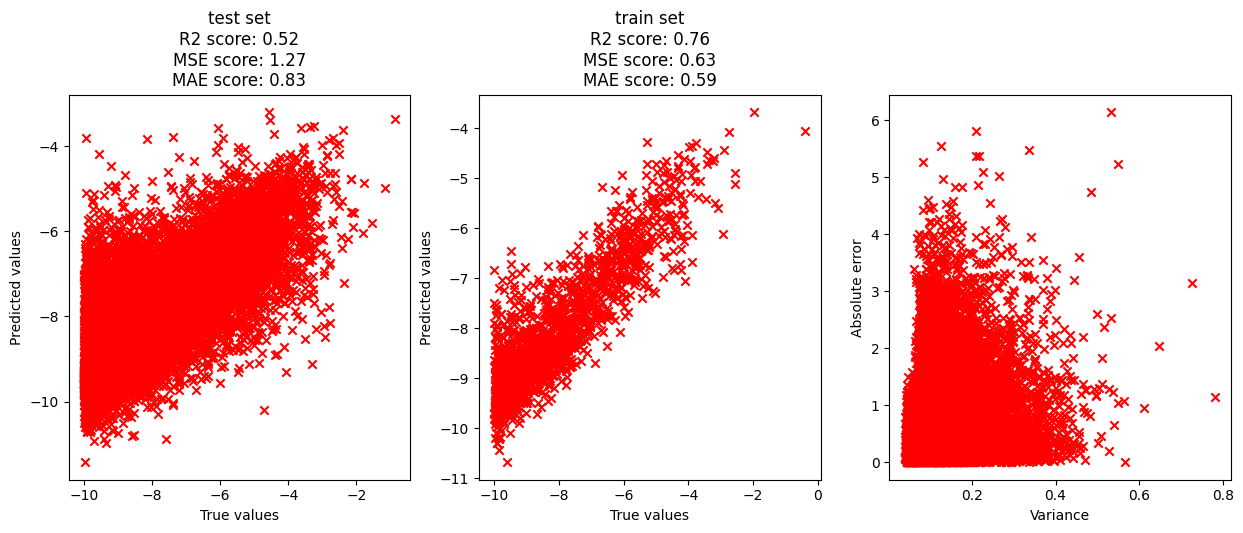

In [49]:
SP = Searched_space.Searched_Space(number_of_fragments=6,df=df_precursors,features_frag=df_precursors.columns[0:1],generation_type='conditional')
# run BO

searched_space_df, searched_space_df_sample, fitness_acquired, fitness_acquired_sample = prepare_search_sapce_data(SP)
BO = Search_algorithm.Bayesian_Optimisation()
BO.verbose = True
%matplotlib inline
X_train, X_test, y_train , y_test, y_scaler   = BO.get_test_train_data_for_BO(searched_space_df,fitness_acquired,test_set_size=0.9)  
print('Training size',X_train.shape)
y_pred, y_var, y_pred_train, y_train, y_test, y_var_train = BO.test_model_prediction(X_train, y_train, X_test, y_test, y_scaler)
BO.plot_prediction(y_pred,y_test,y_pred_train,y_train,y_var)

Training size torch.Size([218, 1000])
R2 score: 0.66
MSE score: 0.04
MAE score: 0.14
R2 score: 1.00
MSE score: 0.00
MAE score: 0.01


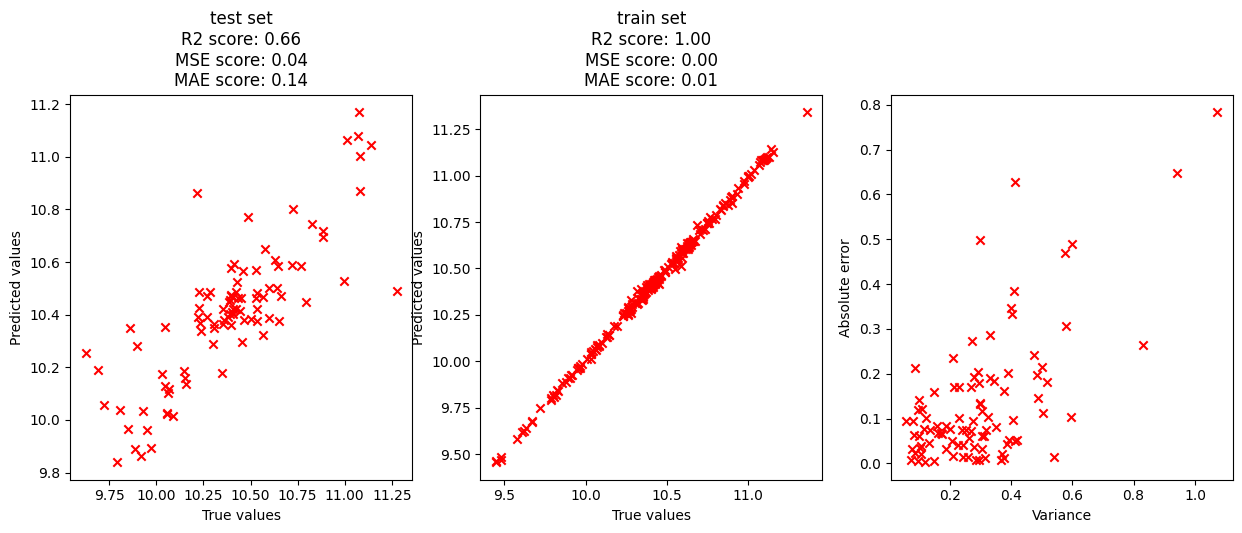

In [282]:
from sklearn.preprocessing import StandardScaler
import torch
from sklearn.model_selection import train_test_split

PCA_components = 3
pca = PCA(n_components=PCA_components)
pca.fit(slatm_rpr)
pca_rpr = pca.transform(slatm_rpr)
def get_test_train_data_for_BO(
        search_space_df: pd.DataFrame = [],
        fitness_acquired: list = [],
        test_set_size: float = 0.2,
    ):
        def transform_data(X_train, y_train, X_test, y_test):
            """
            Apply feature scaling, dimensionality reduction to the data. Return the standardised and low-dimensional train and
            test sets together with the scaler object for the target values.

            :param X_train: input train data
            :param y_train: train labels
            :param X_test: input test data
            :param y_test: test labels
            :return: X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled, y_scaler
            """
            X_train_scaled = (X_train - X_train.min(axis=0).values) / (
                X_train.max(axis=0).values - X_train.min(axis=0).values+0.01
            )
            X_test_scaled = (X_test - X_test.min(axis=0).values) / (
                X_test.max(axis=0).values - X_test.min(axis=0).values+0.01
            )
            y_scaler = StandardScaler()
            y_train_scaled = y_scaler.fit_transform(y_train)
            y_test_scaled = y_scaler.transform(y_test)

            return (
                X_train_scaled,
                y_train_scaled,
                X_test_scaled,
                y_test_scaled,
                y_scaler,
            )

        X_explored = torch.tensor(
            search_space_df.values, dtype=torch.float64
        )
        # limit the dataframe to only the numeric data
        y_explored = torch.tensor(
            fitness_acquired, dtype=torch.float64
        )

        X_train, X_test, y_train, y_test = train_test_split(
            X_explored, y_explored, test_size=test_set_size, random_state=0
        )

        y_train = y_train.reshape(-1, 1)
        y_test = y_test.reshape(-1, 1)

        #  We standardise the outputs but leave the inputs unchanged

        X_train, y_train, X_test, y_test, y_scaler = transform_data(
            X_train, y_train, X_test, y_test
        )
        return X_train, X_test, y_train, y_test, y_scaler
for x in range(PCA_components):
    df_precursors['pca'+str(x)] = pca_rpr[:,x]
BO = Search_algorithm.Bayesian_Optimisation()
BO.verbose = True
searched_space_df= df_slatm[['slatm_rpr'+str(x) for x in range(1000)]]
#numeric_cols = searched_space_df.select_dtypes(include=['float64', 'int64','float32']).columns
#searched_space_df = searched_space_df[numeric_cols]
df_slatm['target'] = np.abs(df_slatm['1 Excited state Energy (eV)']-4)+np.abs(df_slatm['1 Excited state Osc']-10)
fitness_acquired=df_slatm['target'].values
X_train, X_test, y_train , y_test, y_scaler   = get_test_train_data_for_BO(searched_space_df,fitness_acquired,test_set_size=0.3)  
print('Training size',X_train.shape)
%matplotlib inline

y_pred, y_var, y_pred_train, y_train, y_test, y_var_train = BO.test_model_prediction(X_train, y_train, X_test, y_test, y_scaler)
BO.plot_prediction(y_pred,y_test,y_pred_train,y_train,y_var)


In [110]:
numeric_cols = searched_space_df.select_dtypes(include=['float64', 'int64','float32']).columns
searched_space_df = searched_space_df[numeric_cols]

In [261]:
searched_space_df= df_slatm[['slatm_rpr'+str(x) for x in range(1000)]]

numeric_cols = searched_space_df.select_dtypes(include=['float64', 'int64','float32',]).columns
numeric_cols

Index([], dtype='object')

In [275]:
df_slatm

InChIKey  slatm_rpr0  slatm_rpr1  slatm_rpr2  \
0    HNRHIGPDSSXEJA-FARCUNLSSA-N         0.0         2.0        70.0   
1    XMPYSHMKPRWIPF-UQCOIBPSSA-N         0.0         4.0        70.0   
2    NGTUECGTXMWUQR-UHFFFAOYSA-N         0.0         6.0        70.0   
3    LPTRCOXHGVILNO-UHFFFAOYSA-N         0.0        10.0        70.0   
4    ULRLMMWHCRPTDR-UHFFFAOYSA-N        32.0        12.0        70.0   
..                           ...         ...         ...         ...   
307  DGNQPUBGEVNPSD-WMZJFQQLSA-N         0.0         6.0        70.0   
308  NDEGJNYUKUSEKE-UHFFFAOYSA-N         0.0         6.0        70.0   
309  GOHMZODPOMNOAD-UHFFFAOYSA-N         0.0         6.0        70.0   
310  BJFIUKSBVAJFOJ-WTKPLQERSA-N         0.0         4.0        70.0   
311  PQZAHLJJGPAGBD-OQFOIZHKSA-N         0.0         3.0        70.0   

     slatm_rpr3  slatm_rpr4  slatm_rpr5  slatm_rpr6  slatm_rpr7  slatm_rpr8  \
0          78.0        14.0         8.0        18.0         0.0         0.0   
1          72.0        14.0         8.0         0.0        16.0         0.0   
2         102.0        14.0         8.0         0.0         0.0         0.0   
3          72.0         0.0         0.0         0.0        16.0         0.0   
4          72.0         0.0         0.0         0.0        32.0         0.0   
..          ...         ...         ...         ...         ...         ...   
307        84.0        14.0        16.0         0.0         0.0         0.0   
308        78.0         0.0         8.0         0.0         0.0         0.0   
309        78.0         0.0        16.0         0.0        48.0         0.0   
310        78.0        14.0         8.0         0.0         0.0         0.0   
311        78.0        14.0         8.0         9.0         0.0         0.0   

     ...    pca291    pca292    pca293    pca294        pca295        pca296  \
0    ... -0.000486 -0.001931 -0.000326 -0.001384  7.069663e-04  1.773507e-03   
1    ... -0.000523 -0.000253  0.001012 -0.000301  9.990483e-04  4.074271e-04   
2    ...  0.000001  0.000001 -0.000001 -0.000006 -6.165659e-07  3.598747e-07   
3    ... -0.002748 -0.003003 -0.004311 -0.002269  9.413809e-04  5.046281e-03   
4    ...  0.003341  0.002856  0.000870  0.000388  6.310424e-04  1.892832e-03   
..   ...       ...       ...       ...       ...           ...           ...   
307  ... -0.001397  0.000176 -0.000293 -0.000884  4.379985e-04 -8.527248e-04   
308  ...  0.005473  0.008349  0.009332 -0.011940 -6.563415e-03  4.390469e-03   
309  ...  0.003896  0.001554 -0.000069  0.000046 -9.971129e-04 -6.041081e-04   
310  ... -0.001842 -0.000803 -0.001734  0.001580 -3.990065e-03  2.540008e-03   
311  ...  0.000117 -0.000001  0.000014 -0.000040  1.361768e-05  3.026289e-06   

           pca297    pca298    pca299  slatm_rpr  
0   -1.872595e-03  0.000736 -0.000646          0  
1   -6.420646e-05 -0.000253  0.000718          0  
2    1.621629e-07 -0.000001 -0.000001          0  
3    5.373665e-03 -0.001231  0.001335          0  
4    7.182336e-05 -0.001610  0.002070          0  
..            ...       ...       ...        ...  
307  6.904078e-04 -0.001188  0.001192          0  
308 -7.121810e-03 -0.000728  0.003484          0  
309  1.217317e-03 -0.000383  0.001530          0  
310 -1.349843e-03  0.001236  0.002771          0  
311  1.522456e-06 -0.000026  0.000028          0  

[312 rows x 11427 columns]

In [272]:
X_train

tensor([[0.0000, 0.4545,    nan, 0.3333, 0.0000, 0.6667, 0.0000, 0.6667,    nan,
            nan],
        [0.0000, 0.6364,    nan, 0.4167, 0.6667, 0.3333, 0.0000, 0.0000,    nan,
            nan],
        [0.0000, 0.0909,    nan, 0.3333, 0.0000, 0.6667, 0.0000, 0.6667,    nan,
            nan],
        [0.0000, 0.4545,    nan, 1.0000, 0.6667, 0.3333, 0.0000, 0.0000,    nan,
            nan],
        [0.0000, 0.7273,    nan, 0.7500, 0.3333, 0.6667, 0.0000, 0.0000,    nan,
            nan],
        [0.0000, 0.6364,    nan, 0.4167, 0.0000, 0.0000, 0.0000, 0.6667,    nan,
            nan],
        [0.0000, 0.6364,    nan, 0.8333, 0.0000, 0.3333, 0.0000, 1.0000,    nan,
            nan],
        [1.0000, 1.0000,    nan, 0.5833, 0.0000, 0.0000, 0.0000, 0.6667,    nan,
            nan],
        [0.0000, 0.5455,    nan, 0.6667, 0.0000, 0.6667, 0.0000, 1.0000,    nan,
            nan],
        [0.0000, 0.2727,    nan, 0.8333, 0.6667, 0.3333, 0.0000, 0.3333,    nan,
            nan],
        [0

In [214]:
print(slatm_names[0])
print(df_precursors[df_precursors['InChIKey']==slatm_names[0].split('/')[1].replace('.xyz','')]['InChIKey'])
slatm_rpr[0]
for count, name in enumerate(slatm_names):
   InChIKey_slatm = name.split('/')[1].replace('.xyz','')
   df_precursors[df_precursors['InChIKey']==InChIKey_slatm]['slatm_rpr'] =  [slatm_rpr[count]]

cache/HNRHIGPDSSXEJA-FARCUNLSSA-N.xyz
254    HNRHIGPDSSXEJA-FARCUNLSSA-N
Name: InChIKey, dtype: object


C:\Users\ma11115\AppData\Local\Temp\ipykernel_1512\3848055705.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_precursors[df_precursors['InChIKey']==InChIKey_slatm]['slatm_rpr'] =  [slatm_rpr[count]]


In [233]:
import pandas as pd
df_slatm = pd.DataFrame(slatm_names,columns=['InChIKey'])
#df_slatm['slatm_rpr']=slatm_rpr

In [247]:
for x in range(slatm_rpr.shape[1]):
    df_slatm['slatm_rpr'+str(x)]= slatm_rpr[:,x]

C:\Users\ma11115\AppData\Local\Temp\ipykernel_1512\198950341.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_slatm['slatm_rpr'+str(x)]= slatm_rpr[:,x]
C:\Users\ma11115\AppData\Local\Temp\ipykernel_1512\198950341.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_slatm['slatm_rpr'+str(x)]= slatm_rpr[:,x]
C:\Users\ma11115\AppData\Local\Temp\ipykernel_1512\198950341.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Cons

In [250]:
df_slatm['InChIKey']=df_slatm['InChIKey'].apply(lambda x: x.split('/')[1].replace('.xyz',''))

IndexError: list index out of range

In [269]:
df_slatm.

0